In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prob_mutation = 0.1
population_size = 100

class Bacteria:
    id_counter = 0
    mutation_counter = 0

    @staticmethod
    def new_mutation():
        Bacteria.mutation_counter += 1
        return Bacteria.mutation_counter
        
    def __init__(self, parent = None) -> None:
        self.id = Bacteria.id_counter
        Bacteria.id_counter += 1
        
        self.parent = parent
        self.mutations = set()
        self.children = []

        if parent:
            self.mutations = parent.mutations.copy()
            parent.children.append(self)

        if np.random.rand() < prob_mutation:
            self.mutations.add(Bacteria.new_mutation())

        
    def copy(self):
        b = Bacteria()
        b.mutations = self.mutations.copy()



class Person:
    def __init__(self, bacteria = None) -> None:
        if bacteria:
            self.bacteria = bacteria
        else:
            self.bacteria = [Bacteria() for _ in range(population_size)]

    def evolve(self, T):
        for _ in range(T):
            parents = np.random.choice(population_size, size=population_size)
            next_generation = [Bacteria(self.bacteria[parents[i]]) for i in range(population_size)]
            self.bacteria = next_generation
    
    def contaminate(self):
        r = np.random.choice(population_size)
        random_bacteria = self.bacteria[r]
        return Person([random_bacteria.copy() for _ in range(population_size)])
    
    def get_mutations(self):
        return [b.mutations for b in self.bacteria]
    
    def get_mutation_counters(self):
        mutations = self.get_mutations()
        all_mutations = set()
        for mut in mutations:
            all_mutations.update(mut)
        
        counters = {mutation: 0 for mutation in all_mutations}
        for mut in mutations:
            for m in mut:
                counters[m] += 1
        
        # sort by value
        counters = {k: v for k, v in sorted(counters.items(), key=lambda item: item[1], reverse=True)}

        return counters
    
    def get_nca_count(self):
        # nca = not coalesced alleles
        mutation_counters = self.get_mutation_counters()
        nca = {k: v for k, v in mutation_counters.items() if v > 0 and v < population_size}
        return len(nca)


In [3]:
def experiment(T1, T2):
    p1 = Person()
    p1.evolve(T1)
    p2 = p1.contaminate()
    p1.evolve(T2)
    p2.evolve(T2)

    nca1 = p1.get_nca_count()
    nca2 = p2.get_nca_count()
    return nca1, nca2

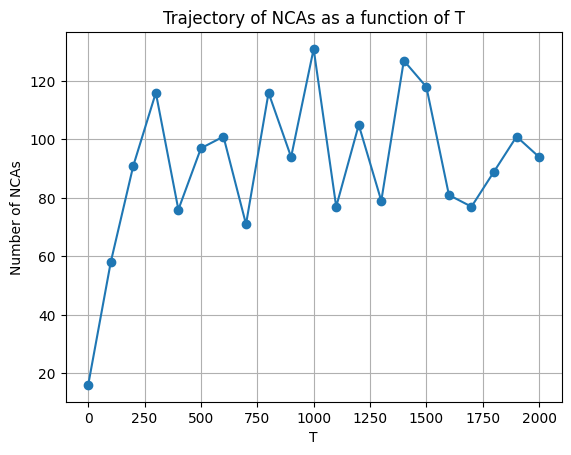

In [4]:
T_values = range(0, 2001, 100)  # Define a range of T values
nca_trajectory = []

for T in T_values:
    p1 = Person()
    p1.evolve(T)
    nca_trajectory.append(p1.get_nca_count())

plt.plot(T_values, nca_trajectory, marker='o')
plt.xlabel('T')
plt.ylabel('Number of NCAs')
plt.title('Trajectory of NCAs as a function of T')
plt.grid(True)
plt.show()